### Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tqdm import tqdm
import random

### Importing Dataset

In [32]:
df = pd.read_csv("Dry Bean Dataset.csv")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [33]:
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [4]:
x = df.drop('Class', axis=1)
y = df['Class']

### Pre-Processing

In [5]:
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

### Parameter Optimization

In [9]:
results = []
all_convergences = []
for sample_id in tqdm(range(10), desc="Samples"):
    x_train, x_test, y_train, y_test = train_test_split(
        x_scaled, y, test_size=0.3, stratify=y, random_state=sample_id)

    best_acc = 0
    best_params = {}
    acc_list = []

    cumulative_best = []

    for i in range(100):
        kernel = random.choice(['linear', 'poly', 'rbf', 'sigmoid'])
        C = random.choice([0.1, 1, 10, 100])
        gamma = random.choice(['scale', 0.01, 0.1, 1])
        degree = random.choice([2, 3, 4]) if kernel == 'poly' else 3

        model = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree)
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        acc = accuracy_score(y_test, preds)

        if acc > best_acc:
            best_acc = acc
            best_params = {
                'kernel': kernel,
                'C': C,
                'gamma': gamma,
                'degree': degree
            }

        cumulative_best.append(best_acc)

    all_convergences.append((sample_id, cumulative_best))
    results.append({
        'Sample': f"S{sample_id + 1}",
        'Best Accuracy': best_acc,
        'Kernel': best_params['kernel'],
        'C': best_params['C'],
        'Gamma': best_params['gamma'],
        'Degree': best_params['degree']
    })


Samples: 100%|██████████| 10/10 [3:44:02<00:00, 1344.26s/it] 


In [10]:
df_results = pd.DataFrame(results)
print("\nFinal Results Table:")
print(df_results)


Final Results Table:
  Sample  Best Accuracy Kernel    C  Gamma  Degree
0     S1       0.934133    rbf  100   0.01       3
1     S2       0.934378    rbf   10    0.1       3
2     S3       0.937071    rbf   10  scale       3
3     S4       0.929726    rbf  100  scale       3
4     S5       0.931195    rbf  100   0.01       3
5     S6       0.941234    rbf  100   0.01       3
6     S7       0.932174    rbf   10    0.1       3
7     S8       0.933154    rbf  100  scale       3
8     S9       0.931929    rbf  100   0.01       3
9    S10       0.931440    rbf   10    0.1       3


In [11]:
best_sample_id = df_results['Best Accuracy'].idxmax()
best_sample_conv = all_convergences[best_sample_id][1]

### Visualizing the Convergence Graph for best sample

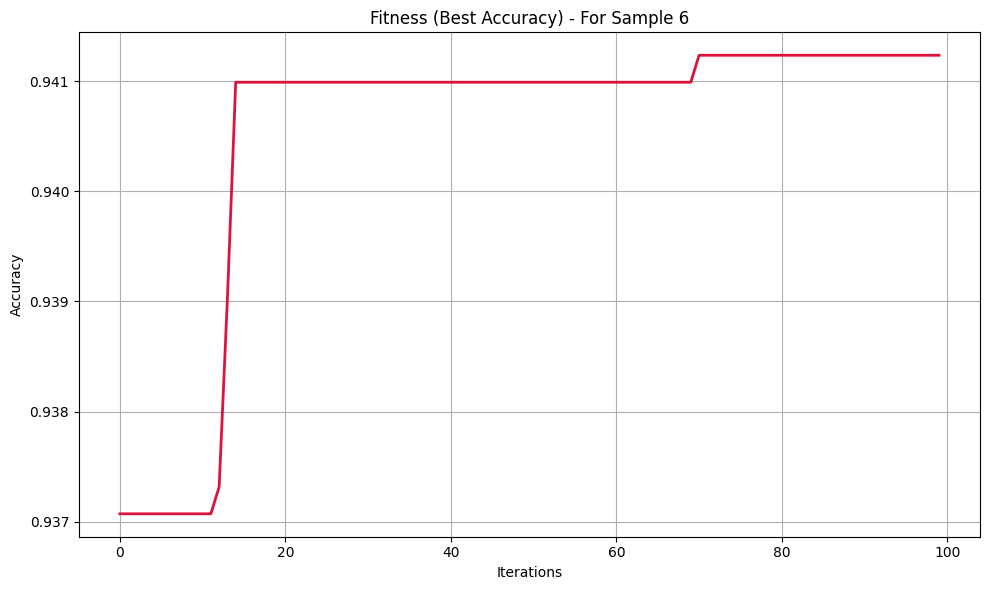

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(range(100), best_sample_conv, linestyle='-', color='crimson',lw = 2)
plt.title("Fitness (Best Accuracy) - For Sample 6")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()